In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
%matplotlib inline

## Подход 1

In [2]:
data = pd.read_csv('./features.csv', index_col='match_id')
y = data['radiant_win'] # пункт 4. В колонке Radiant_win целевая переменная
result_columns = ['start_time','duration','radiant_win','tower_status_radiant','tower_status_dire','barracks_status_radiant','barracks_status_dire']
data.drop(result_columns,axis=1,inplace=True)
print data.shape
data.head()
# пункт 1

(97230, 101)


,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,...,radiant_ward_sentry_count,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time
match_id,,,,,,,,,,,,,,,,,,,,,
0,7,11,5,2098,1489,20,0,0,7,67,...,0,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0
1,0,42,4,1188,1033,9,0,1,12,49,...,0,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0
2,7,33,4,1319,1270,22,0,0,12,98,...,1,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0
3,1,29,4,1779,1056,14,0,0,5,30,...,0,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0
4,7,13,4,1431,1090,8,1,0,8,27,...,0,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0


In [3]:
data.count() # пункт 2

lobby_type                     97230
r1_hero                        97230
r1_level                       97230
r1_xp                          97230
r1_gold                        97230
r1_lh                          97230
r1_kills                       97230
r1_deaths                      97230
r1_items                       97230
r2_hero                        97230
r2_level                       97230
r2_xp                          97230
r2_gold                        97230
r2_lh                          97230
r2_kills                       97230
r2_deaths                      97230
r2_items                       97230
r3_hero                        97230
r3_level                       97230
r3_xp                          97230
r3_gold                        97230
r3_lh                          97230
r3_kills                       97230
r3_deaths                      97230
r3_items                       97230
r4_hero                        97230
r4_level                       97230
r

In [3]:
huge_number = 350 # время точно выходящее за 5 минут
has_nan = ['first_blood_time','radiant_bottle_time','radiant_courier_time','radiant_flying_courier_time','radiant_first_ward_time','dire_bottle_time',
         'dire_courier_time','dire_flying_courier_time','dire_first_ward_time']
values = dict(zip(has_nan,[huge_number]*len(has_nan)))
values['first_blood_team'] = 2 # не занятый номер комадны, все равно потом one-hot
values['first_blood_player1'] = 11.0
values['first_blood_player2'] = 12.0 # не занятый номер игрока. Все равно потом будет one-hot
data.fillna(value = values,inplace=True) # заполняем dataframe. пункт 3
print 'Any null left? {}'.format(data.isnull().values.any()) # на всякий случай проверяем что все заполнилось правильно

Any null left? False


In [57]:
res = []
cv = KFold(n_splits=5,shuffle=True)
for i in range(10,150,10):
    model = GradientBoostingClassifier(n_estimators=i)
    temp = np.mean(cross_val_score(model,data,y,cv=cv,verbose=1,scoring='roc_auc'))
    res.append(temp)
    print temp

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.0s finished


0.665998440787


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   43.8s finished


0.682647794091


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


0.690086367839


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished


0.694829105323


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


0.698065017684


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


0.699579053528


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.4min finished


0.70226476127


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min finished


0.704368280564


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished


0.70507183694


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.4min finished


0.706717978694


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.8min finished


0.707732033521


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.3min finished


0.70808758192


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.7min finished


0.709313841184
0.71020092675


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.1min finished


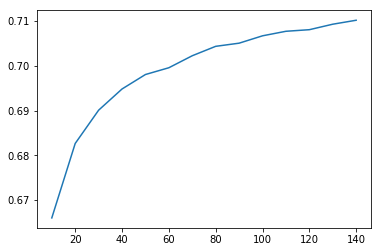

In [62]:
plt.plot(range(10,150,10),res)

## Отчет 1
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)? __ _Пропуски имеют признаки связанные со временем. Они принимают значение nan когда за 5 минут игры событие не успело произойти. Например покупка курьера и летающего курьера не всегда успевала произойти за 5 минут_ __
2. Как называется столбец, содержащий целевую переменную? __ _radiant-win_ __
3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC. __ _ Для 30 деревьев время кросс-валидации примерно 1 минута. Полученное при это качество 0.69 _ __
4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев? __ Есть смысл увеличивать количество деревьев т.к. качество на кросс-валидации растет с увеличение количества деревьев. Можно сократить время обучения если использовать 3 фолда вместо 5. Можно использовать только часть обучающей выборки. Можно считать сразу на нескольких ядрах (хотя деревья строятся последовательно, небольшой прирост в скорости все равно будет.  __

## Подход 2

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as logreg

In [18]:
data_scaled = StandardScaler().fit_transform(data)
cv = KFold(n_splits=5,shuffle=True)
res2 = []
for c in [0.1,0.5,1,2,5,7,10,20]:
    model = logreg(C=c,penalty='l2',n_jobs=-1)
    temp2 = np.mean(cross_val_score(model,data_scaled,y,cv=cv,n_jobs=-1,scoring='roc_auc'))
    print temp2
    res2.append(temp2)
print res2

0.716727181718
0.716584340016
0.716700386533
0.71687806103
0.716674964937
0.716736804277
0.716906229915
0.716417073543
[0.71672718171752603, 0.71658434001587756, 0.71670038653316726, 0.7168780610304839, 0.71667496493681904, 0.71673680427677167, 0.71690622991484343, 0.71641707354269379]


0.716906229915


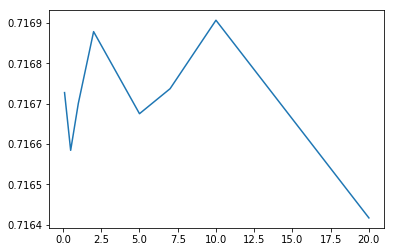

In [21]:
print np.max(res2)
plt.plot([0.1,0.5,1,2,5,7,10,20],res2)

0.716665341427
0.716661536293
0.716661229133
0.716660493896
0.716660290423
0.716660347617
0.716660269215
0.716660277687
0.716665341427


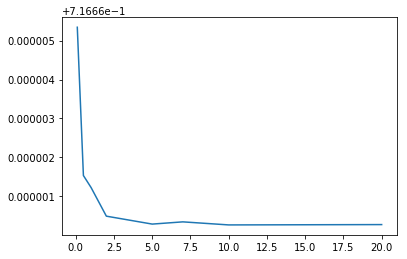

In [22]:
cat_values =  ['lobby_type']+['r{}_hero'.format(i) for i in range(1,6)]+['d{}_hero'.format(i) for i in range(1,6)]
data_scaled = StandardScaler().fit_transform(data.drop(cat_values,axis = 1))
cv = KFold(n_splits=5,shuffle=True,random_state = 241)
res3 = []
for c in [0.1,0.5,1,2,5,7,10,20]:
    model = logreg(C=c,penalty='l2',n_jobs=8)
    temp2 = np.mean(cross_val_score(model,data_scaled,y,cv=cv,n_jobs=8,scoring='roc_auc'))
    print temp2
    res3.append(temp2)
print np.max(res3)
plt.plot([0.1,0.5,1,2,5,7,10,20],res3)

In [46]:
np.max(data.r1_hero.unique())

112

In [18]:
N = 112 # количество уникальных персоажей
X_pick = np.zeros((data.shape[0], N))
cat_values =  ['lobby_type']+['r{}_hero'.format(i) for i in range(1,6)]+['d{}_hero'.format(i) for i in range(1,6)]
data_scaled = StandardScaler().fit_transform(data.drop(cat_values,axis = 1))
for i, match_id in enumerate(data.index):
    for p in xrange(5):
        X_pick[i, data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
X = np.hstack([data_scaled,X_pick])

0.752359399898
0.752342195765
0.752339062739
0.752337516164
0.752335908278
0.752335372475
0.752335048417
0.752334925364
0.752359399898


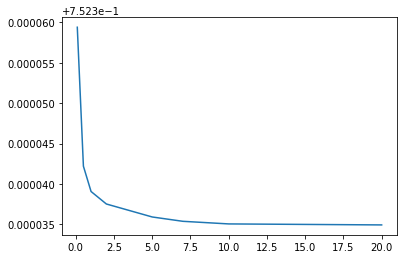

In [57]:
res4 = []
for c in [0.1,0.5,1,2,5,7,10,20]:
    model = logreg(C=c,penalty='l2',n_jobs=8)
    temp2 = np.mean(cross_val_score(model,X,y,cv=cv,n_jobs=8,scoring='roc_auc'))
    print temp2
    res4.append(temp2)
print np.max(res4)
plt.plot([0.1,0.5,1,2,5,7,10,20],res4)

In [11]:
model_2 = GradientBoostingClassifier(n_estimators=150)
cv = KFold(n_splits=5,shuffle=True,random_state = 241)
print np.mean(cross_val_score(model_2,X,y,cv=cv,scoring = 'roc_auc',verbose=1,n_jobs=-1))

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.9min remaining:  8.9min


0.722426356993


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.0min finished


In [24]:
model_1 = logreg(C=0.1,penalty='l2',n_jobs=8).fit(X,y)
print 'Logistic Regression trained'
model_2 = GradientBoostingClassifier(n_estimators=250,n_jobs = -1).fit(X,y)

Logistic Regression trained


In [21]:
# обрабатываем тестовые значения
data_test = pd.read_csv('features_test.csv',index_col='match_id')
huge_number = 350 # время точно выходящее за 5 минут
has_nan = ['first_blood_time','radiant_bottle_time','radiant_courier_time','radiant_flying_courier_time','radiant_first_ward_time','dire_bottle_time',
         'dire_courier_time','dire_flying_courier_time','dire_first_ward_time']
values = dict(zip(has_nan,[huge_number]*len(has_nan)))
values['first_blood_team'] = 2 # не занятый номер комадны, все равно потом one-hot
values['first_blood_player1'] = 11.0
values['first_blood_player2'] = 12.0 # не занятый номер игрока. Все равно потом будет one-hot
data_test.fillna(value = values,inplace=True) # заполняем dataframe. пункт 3
print 'Any null left? {}'.format(data_test.isnull().values.any()) # на всякий случай проверяем что все заполнилось правильно
N = 112 # количество уникальных персоажей
X_pick_test = np.zeros((data_test.shape[0], N))
cat_values =  ['lobby_type','start_time']+['r{}_hero'.format(i) for i in range(1,6)]+['d{}_hero'.format(i) for i in range(1,6)]
data_scaled_test = StandardScaler().fit_transform(data_test.drop(cat_values,axis = 1))
for i, match_id in enumerate(data_test.index):
    for p in xrange(5):
        X_pick_test[i, data_test.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick_test[i, data_test.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
X_test = np.hstack([data_scaled_test,X_pick_test])
print X_test.shape

Any null left? False


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


(17177L, 202L)


In [47]:
match_id = pd.read_csv('features_test.csv')['match_id']
ans1 = pd.DataFrame(zip(match_id,model_1.predict_proba(X_test)[:,1]),columns=['match_id','radiant_win'])
ans2 = pd.DataFrame(zip(match_id,model_2.predict_proba(X_test)[:,1]),columns=['match_id','radiant_win'])

In [52]:
print ans1.radiant_win.min()
print ans1.radiant_win.max()

0.00765536863112
0.996676011065


In [48]:
ans1.to_csv('ans1.txt',index = False)
ans2.to_csv('ans2.txt',index = False)

## Отчет 2
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом? __ Максимальное качество полученное с помощью логистической регрессии лучше (0.7169 против 0.7102 у гр.бустинга). Одна из возможных причин - недообученный гр. бустинг, который мог бы показать себя лучше при увеличении количетсва деревьев т.к. видно что он еще не вышел на максимальное значение по качеству. Градиентный бустинг работает лишь чуть медленнее чем логистическая регрессия.  __
2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение? __ От этого качество падает, но очень незначительно (0.7166 против 0.7169 с ними) __
3. Сколько различных идентификаторов героев существует в данной игре? __ Всего 108 уникальных, но максимальный id персонажа 112 __
4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить? __ Качество сильно улучшилось и стало равно 0.752 Это объясняется тем, что разные персонажи вносят разный вклад в победу.  Качество гр.бустинга обученного на мешке слов героев тоже возросло, но не так сильно. (Стало 0.722, было 0.710) __
5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов? __ На тестовой выборке минимум получилось 0.008, максимум 0.996 Точность после на кагле составила 0.756 __